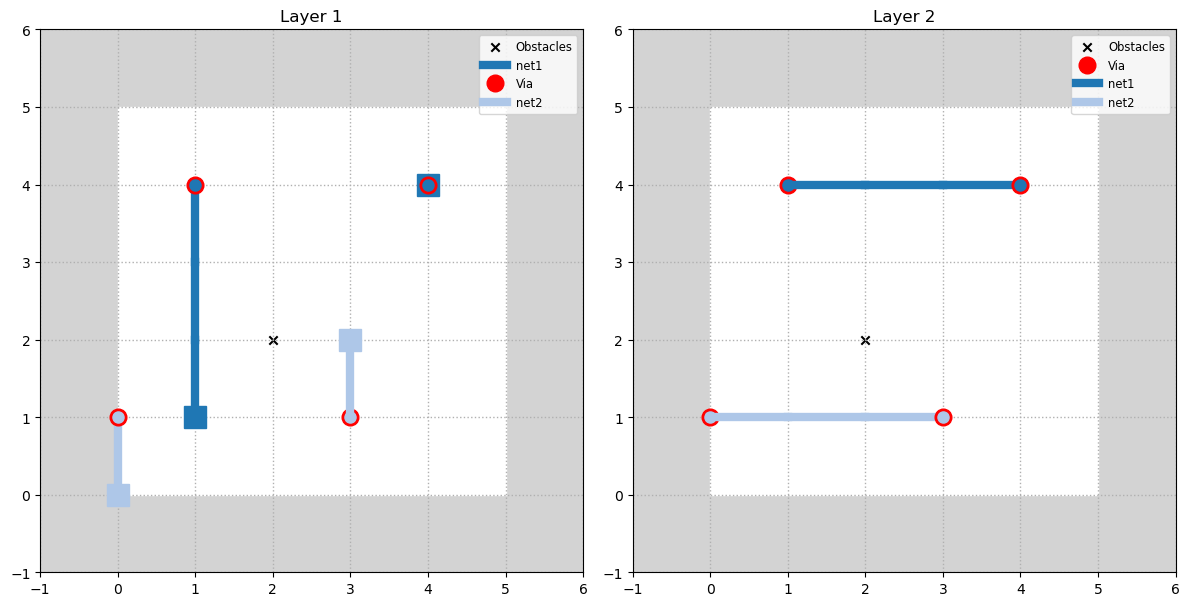

In [86]:
import matplotlib.pyplot as plt
import re
def parse_input_file(file_path):
    with open(file_path, 'r') as f:
        lines = [line.strip() for line in f if line.strip()]
    grid_line = lines[0]
    grid_width, grid_height, *other_params = map(int, grid_line.split(','))
    obs_lines = []
    pin_lines = []
    for line in lines[1:]:
        if line.startswith("OBS"):
            obs_lines.append(line)
        else:
            pin_lines.append(line) 
    obstacles = []
    for line in obs_lines:
        match = re.search(r'\((\d+),\s*(\d+)\)', line)
        if match:
            obstacles.append(tuple(map(int, match.groups())))

    pins = []
    net_names = []
    for line in pin_lines:
        tokens = line.split()
        net_names.append(tokens[0])
        coords = re.findall(r'\((\d+),\s*(\d+),\s*(\d+)\)', line)
        net = [tuple(map(int, c)) for c in coords]
        if net:
            pins.append(net)

    return (grid_width, grid_height), obstacles, pins, net_names

def parse_output_file(filename):
    output_nets = []
    with open(filename, 'r') as f:
        lines = [line.strip() for line in f if line.strip()]
    
    for line in lines:
        tokens = line.split()
        coords = re.findall(r'\((\d+),\s*(\d+),\s*(\d+)\)', line)
        net = [tuple(map(int, c)) for c in coords]
        if net:
            output_nets.append(net)
    
    return output_nets

def visualize(grid_size, obstacles, input_nets, output_nets, net_names=None):
    layers_used = sorted(set(pt[0] for net in output_nets for pt in net))
    transition_color = 'red'

    fig, axs = plt.subplots(1, len(layers_used), figsize=(6 * len(layers_used), 6))
    if len(layers_used) == 1:
        axs = [axs]

    layer_to_ax = {}
    for ax, layer in zip(axs, layers_used):
        layer_to_ax[layer] = ax
        ax.set_title(f"Layer {layer}")
        padding = 1
        ax.set_xlim(-padding, grid_size[0] +padding)
        ax.set_ylim(-padding, grid_size[1]+padding)
        #ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.grid(True, linestyle=':', linewidth=1)
        ax.add_patch(plt.Rectangle((-padding, -padding), grid_size[0] + 2*padding, grid_size[1] + 2*padding,
                                  color='lightgray', zorder=-1))
        ax.add_patch(plt.Rectangle((0, 0), grid_size[0], grid_size[1], color='white', zorder=0))
        if obstacles:
            ox, oy = zip(*obstacles)
            ax.scatter(ox, oy, color='black', marker='x', label='Obstacles')

    cmap = plt.colormaps.get_cmap('tab20')
    legend_added = set()
    for net_idx, net in enumerate(input_nets):
        net_color = cmap(net_idx)
        net_label = net_names[net_idx] if net_names else f"net{net_idx + 1}"
        #print(net_label)
        for (layer, x, y) in net:
            ax = layer_to_ax.get(layer)
            if ax:
                ax.plot(x, y, marker='s', color=net_color, markersize=16,
                        linestyle='None')
        legend_added.add(net_label)
    for net_idx, net in enumerate(output_nets):
        net_color = cmap(net_idx)
        net_label = net_names[net_idx] if net_names else f"net{net_idx + 1}"

        for i in range(len(net) - 1):
            l1, x1, y1 = net[i]
            l2, x2, y2 = net[i + 1]

            if l1 == l2:
                ax = layer_to_ax[l1]
                ax.plot([x1, x2], [y1, y2], color=net_color, linewidth=6,
                        label=net_label if (l1, net_label) not in legend_added else "")
                legend_added.add((l1, net_label))
            else:
                #if i>0:
                    for l in [l1, l2]:
                        ax = layer_to_ax.get(l)
                        if ax:
                            ax.plot(x2, y2, marker='o', color=transition_color, markersize=12,
                                    linestyle='None', label='Via' if ('via', l) not in legend_added else "")
                            ax.plot(x2, y2, marker='o', color=net_color, markersize=8,
                                    linestyle='None')
                            legend_added.add(('via', l))
    for ax in axs:
        ax.legend(loc='upper right', fontsize='small')


    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    input_filename = "input.txt"
    output_filename = "output.txt"

    grid_size, obstacles, input_nets, net_names = parse_input_file(input_filename)
    output_nets = parse_output_file(output_filename)
    #print(len(net_names))
    #print(len(output_nets))
    visualize(grid_size, obstacles, input_nets, output_nets, net_names)

In [75]:
cmap = plt.colormaps.get_cmap('tab20')